In [16]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from turtle import color
from sklearn.linear_model import LinearRegression


**Entire home**

In [17]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('Roma shared room.csv')
df.head()

id                                      name  \
0   1120573.0               Youth Station Hostel - Rome   
1   8047377.0                     Stanza  Orange doppia   
2   8802768.0                      una stanza con banio   
3   8927778.0                        Grigoras petronela   
4  13111806.0  POSTO LETTO IN DOPPIA $ 280 DAL 1 GIUGNO   

                                         description  \
0                                         Indefinido   
1  The apartment is well laid out and bright, it ...   
2  A room with a bathroom. A regular room for a c...   
3  And everything mobilat or, you also want a mon...   
4  My place is close to Fermata Metro Bologna - 2...   

                               neighborhood_overview   host_id      host_name  \
0                                         Indefinido   6147702  Youth Station   
1  It is a very quiet neighborhood made up of tow...  42412268      Francesco   
2                                         Indefinido  46125403         Bontoi   
3                                         Indefinido  46125403         Bontoi   
4                                         Indefinido  43927286          Mabel   

   host_since    host_location  host_response_time host_response_rate  ...  \
0  29/04/2013      Rome, Italy  within a few hours                90%  ...   
1  24/08/2015      Rome, Italy  within a few hours               100%  ...   
2  09/10/2015  BacÄƒu, Romania  within a few hours                80%  ...   
3  09/10/2015  BacÄƒu, Romania  within a few hours                80%  ...   
4  11/09/2015      Rome, Italy  within a few hours                80%  ...   

  neighbourhood_cleansed.1                    property_type.1  \
0         I Centro Storico                 Entire rental unit   
1  V Prenestino/Centocelle  Private room in bed and breakfast   
2         I Centro Storico                 Entire rental unit   
3         I Centro Storico                 Entire rental unit   
4             XIII Aurelia               Entire vacation home   

       room_type.1  bathrooms_text.1  \
0  Entire home/apt            1 bath   
1     Private room    1 private bath   
2  Entire home/apt           2 baths   
3  Entire home/apt            1 bath   
4  Entire home/apt            1 bath   

                                         amenities.1 has_availability  \
0  ["Air conditioning", "Wine glasses", "Dining t...                t   
1  ["Wine glasses", "Cleaning products", "Luggage...                t   
2  ["Crib", "Dedicated workspace", "Bathtub", "Co...                t   
3  ["Air conditioning", "Safe", "Crib", "Wine gla...                t   
4  ["Crib", "Wine glasses", "Dining table", "Clea...                t   

  instant_bookable  host_total_listings_count  review_scores_accuracy  \
0                f                          1                    4.83   
1                f                          4                    4.79   
2                t                          6                    4.84   
3                t                          2                    4.59   
4                t                          1                    4.96   

  host_is_superhost  
0                 f  
1                 f  
2                 t  
3                 f  
4                 f  

[5 rows x 66 columns]

**price vs host_acceptance rate**

In [18]:
df['price'] = df['price'].fillna('0').astype(str)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

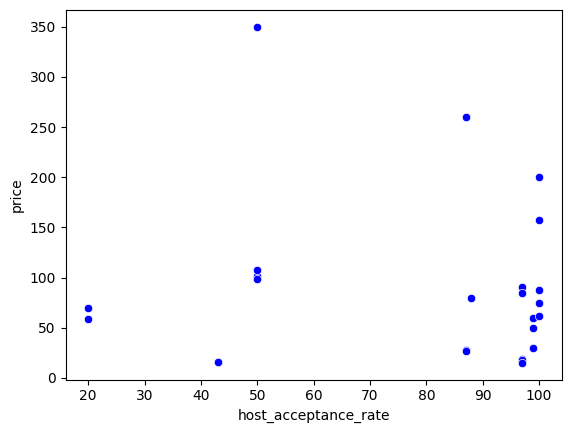

In [19]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [20]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Vars_Dep)
model.score(Vars_Indep,Vars_Dep)

0.012198605583228272

In [21]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_acceptance_rate', y_pred)
df.head()

Predicciones_host_acceptance_rate          id  \
0                         104.667911   1120573.0   
1                          98.193355   8047377.0   
2                          96.222839   8802768.0   
3                          96.222839   8927778.0   
4                          96.222839  13111806.0   

                                       name  \
0               Youth Station Hostel - Rome   
1                     Stanza  Orange doppia   
2                      una stanza con banio   
3                        Grigoras petronela   
4  POSTO LETTO IN DOPPIA $ 280 DAL 1 GIUGNO   

                                         description  \
0                                         Indefinido   
1  The apartment is well laid out and bright, it ...   
2  A room with a bathroom. A regular room for a c...   
3  And everything mobilat or, you also want a mon...   
4  My place is close to Fermata Metro Bologna - 2...   

                               neighborhood_overview   host_id      host_name  \
0                                         Indefinido   6147702  Youth Station   
1  It is a very quiet neighborhood made up of tow...  42412268      Francesco   
2                                         Indefinido  46125403         Bontoi   
3                                         Indefinido  46125403         Bontoi   
4                                         Indefinido  43927286          Mabel   

   host_since    host_location  host_response_time  ...  \
0  29/04/2013      Rome, Italy  within a few hours  ...   
1  24/08/2015      Rome, Italy  within a few hours  ...   
2  09/10/2015  BacÄƒu, Romania  within a few hours  ...   
3  09/10/2015  BacÄƒu, Romania  within a few hours  ...   
4  11/09/2015      Rome, Italy  within a few hours  ...   

  neighbourhood_cleansed.1                    property_type.1  \
0         I Centro Storico                 Entire rental unit   
1  V Prenestino/Centocelle  Private room in bed and breakfast   
2         I Centro Storico                 Entire rental unit   
3         I Centro Storico                 Entire rental unit   
4             XIII Aurelia               Entire vacation home   

       room_type.1 bathrooms_text.1  \
0  Entire home/apt           1 bath   
1     Private room   1 private bath   
2  Entire home/apt          2 baths   
3  Entire home/apt           1 bath   
4  Entire home/apt           1 bath   

                                         amenities.1  has_availability  \
0  ["Air conditioning", "Wine glasses", "Dining t...                 t   
1  ["Wine glasses", "Cleaning products", "Luggage...                 t   
2  ["Crib", "Dedicated workspace", "Bathtub", "Co...                 t   
3  ["Air conditioning", "Safe", "Crib", "Wine gla...                 t   
4  ["Crib", "Wine glasses", "Dining table", "Clea...                 t   

  instant_bookable host_total_listings_count  review_scores_accuracy  \
0                f                         1                    4.83   
1                f                         4                    4.79   
2                t                         6                    4.84   
3                t                         2                    4.59   
4                t                         1                    4.96   

   host_is_superhost  
0                  f  
1                  f  
2                  t  
3                  f  
4                  f  

[5 rows x 67 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

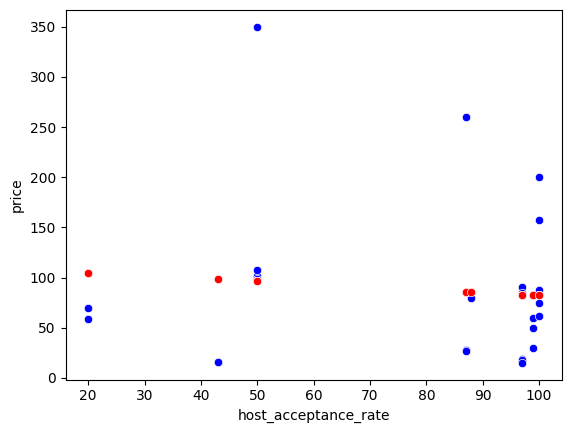

In [22]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_host_acceptance_rate', color="red", data=df)

In [23]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.012198605583228272
Correlación: 0.11044729776335985


**price vs host_is_superhost**

C:\Users\diego\AppData\Local\Temp\ipykernel_13480\1597296358.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')


<Axes: xlabel='host_is_superhost', ylabel='price'>

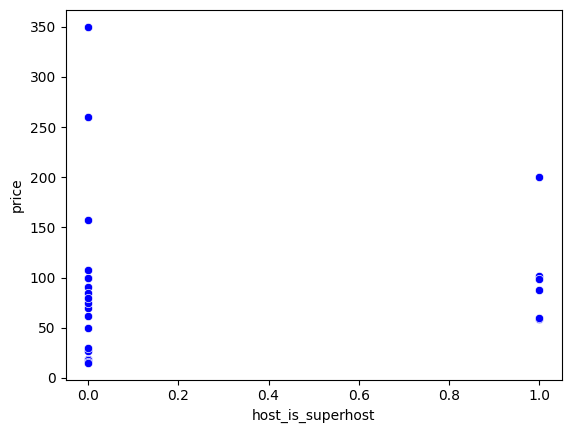

In [24]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [25]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model2 = LinearRegression()
model2.fit(X=Vars_Indep, y=Vars_Dep)
model2.score(Vars_Indep,Vars_Dep)

0.015761096775883998

In [26]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model2.predict(X=df[['host_is_superhost']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_is_superhost', y_pred)
df.head()

Predicciones_host_is_superhost  Predicciones_host_acceptance_rate  \
0                       83.666667                         104.667911   
1                       83.666667                          98.193355   
2                      100.533333                          96.222839   
3                       83.666667                          96.222839   
4                       83.666667                          96.222839   

           id                                      name  \
0   1120573.0               Youth Station Hostel - Rome   
1   8047377.0                     Stanza  Orange doppia   
2   8802768.0                      una stanza con banio   
3   8927778.0                        Grigoras petronela   
4  13111806.0  POSTO LETTO IN DOPPIA $ 280 DAL 1 GIUGNO   

                                         description  \
0                                         Indefinido   
1  The apartment is well laid out and bright, it ...   
2  A room with a bathroom. A regular room for a c...   
3  And everything mobilat or, you also want a mon...   
4  My place is close to Fermata Metro Bologna - 2...   

                               neighborhood_overview   host_id      host_name  \
0                                         Indefinido   6147702  Youth Station   
1  It is a very quiet neighborhood made up of tow...  42412268      Francesco   
2                                         Indefinido  46125403         Bontoi   
3                                         Indefinido  46125403         Bontoi   
4                                         Indefinido  43927286          Mabel   

   host_since    host_location  ... neighbourhood_cleansed.1  \
0  29/04/2013      Rome, Italy  ...         I Centro Storico   
1  24/08/2015      Rome, Italy  ...  V Prenestino/Centocelle   
2  09/10/2015  BacÄƒu, Romania  ...         I Centro Storico   
3  09/10/2015  BacÄƒu, Romania  ...         I Centro Storico   
4  11/09/2015      Rome, Italy  ...             XIII Aurelia   

                     property_type.1      room_type.1 bathrooms_text.1  \
0                 Entire rental unit  Entire home/apt           1 bath   
1  Private room in bed and breakfast     Private room   1 private bath   
2                 Entire rental unit  Entire home/apt          2 baths   
3                 Entire rental unit  Entire home/apt           1 bath   
4               Entire vacation home  Entire home/apt           1 bath   

                                         amenities.1  has_availability  \
0  ["Air conditioning", "Wine glasses", "Dining t...                 t   
1  ["Wine glasses", "Cleaning products", "Luggage...                 t   
2  ["Crib", "Dedicated workspace", "Bathtub", "Co...                 t   
3  ["Air conditioning", "Safe", "Crib", "Wine gla...                 t   
4  ["Crib", "Wine glasses", "Dining table", "Clea...                 t   

   instant_bookable host_total_listings_count review_scores_accuracy  \
0                 f                         1                   4.83   
1                 f                         4                   4.79   
2                 t                         6                   4.84   
3                 t                         2                   4.59   
4                 t                         1                   4.96   

   host_is_superhost  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

[5 rows x 68 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

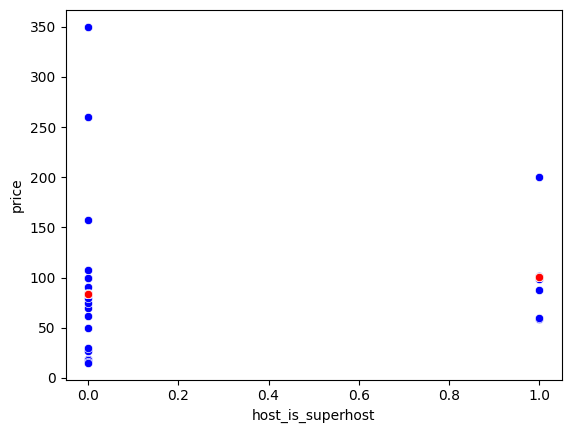

In [27]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_host_is_superhost', color="red", data=df)

In [28]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model2.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.015761096775883998
Correlación: 0.12554320680898667


**accommodates vs bathrooms**


<Axes: xlabel='bathrooms', ylabel='accommodates'>

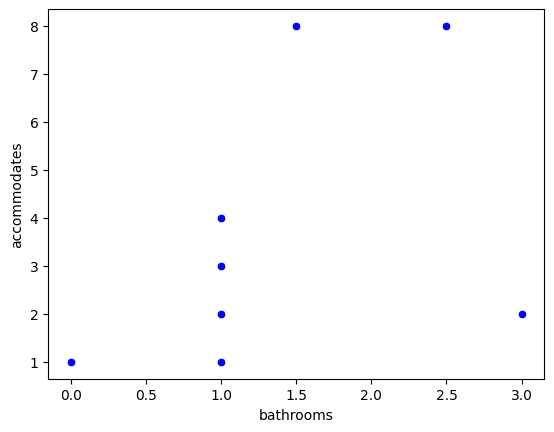

In [29]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [30]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['accommodates']
model3 = LinearRegression()
model3.fit(X=Vars_Indep, y=Vars_Dep)
model3.score(Vars_Indep,Vars_Dep)

0.2166840641718586

In [31]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model3.predict(X=df[['bathrooms']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_bathrooms', y_pred)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

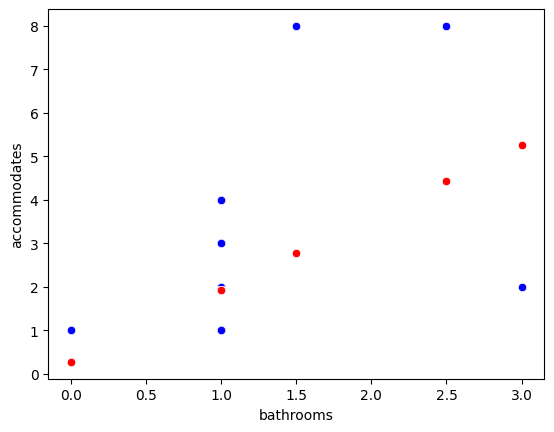

In [32]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms', color="red", data=df)

In [33]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model3.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.2166840641718586
Correlación: 0.465493355668863


**price vs review_scores_cleanliness**


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

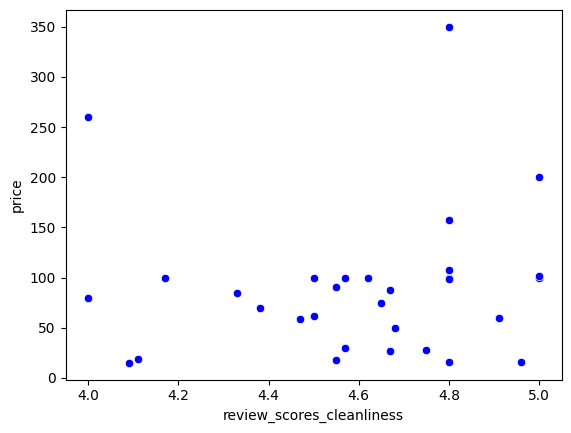

In [34]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [35]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model4 = LinearRegression()
model4.fit(X=Vars_Indep, y=Vars_Dep)
model4.score(Vars_Indep,Vars_Dep)

0.007261594781304503

In [36]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model4.predict(X=df[['review_scores_cleanliness']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_review_scores_cleanliness', y_pred)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

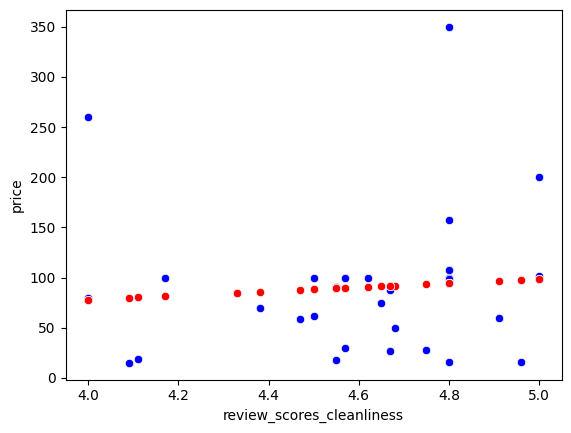

In [37]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_review_scores_cleanliness', color="red", data=df)

In [38]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model4.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.007261594781304503
Correlación: 0.08521499152909952


**price vs host_identity_verified**


C:\Users\diego\AppData\Local\Temp\ipykernel_13480\1167548800.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')


<Axes: xlabel='host_identity_verified', ylabel='price'>

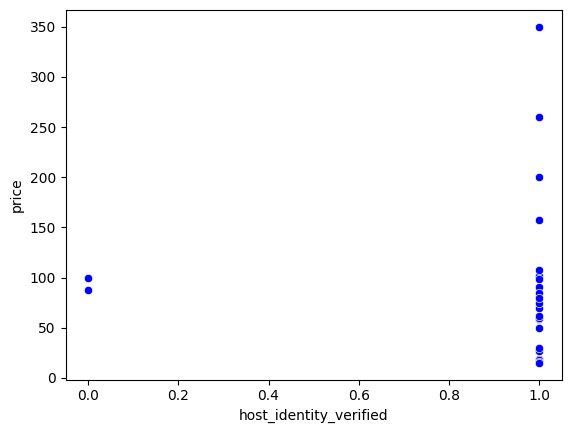

In [39]:
df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)

In [40]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model5 = LinearRegression()
model5.fit(X=Vars_Indep, y=Vars_Dep)
model5.score(Vars_Indep,Vars_Dep)

0.00014650834385232514

In [41]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model5.predict(X=df[['host_identity_verified']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_identity_verifieds', y_pred)

<Axes: xlabel='host_identity_verified', ylabel='price'>

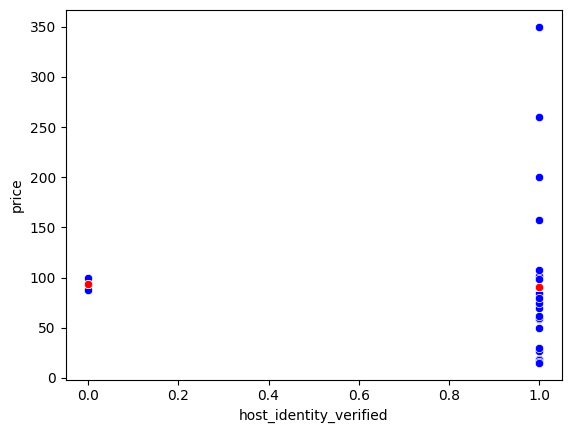

In [42]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_host_identity_verifieds', color="red", data=df)

In [43]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model5.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.00014650834385232514
Correlación: 0.01210406311336508


**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

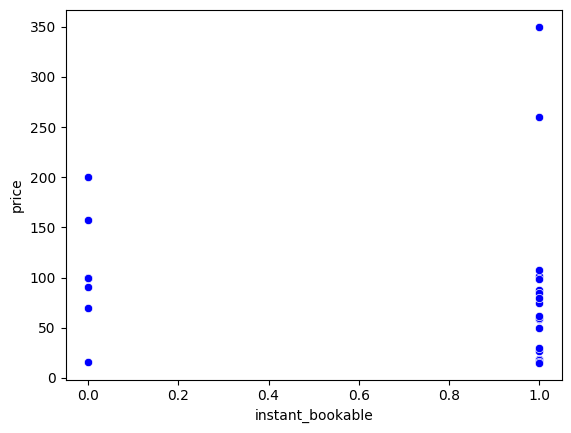

In [44]:
df['instant_bookable']
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].astype(int)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [45]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model6 = LinearRegression()
model6.fit(X=Vars_Indep, y=Vars_Dep)
model6.score(Vars_Indep,Vars_Dep)

0.014152603193778979

In [46]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model6.predict(X=df[['instant_bookable']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_instant_bookable', y_pred)

<Axes: xlabel='instant_bookable', ylabel='price'>

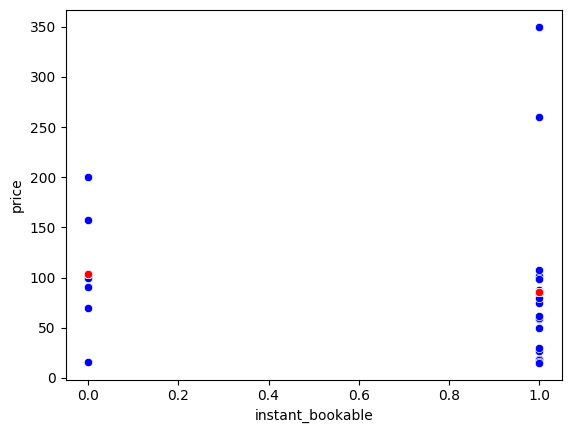

In [47]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_instant_bookable', color="red", data=df)

In [48]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model6.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.014152603193778979
Correlación: 0.11896471407009299


**Price vs property_type**


<Axes: xlabel='property_type', ylabel='price'>

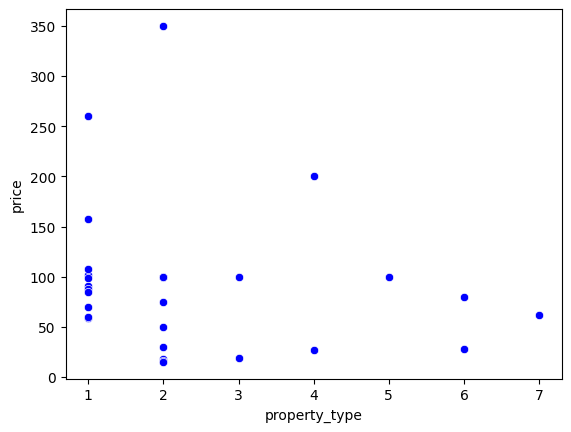

In [49]:
unique_values = df['property_type'].unique()
mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}
df['property_type'] = df['property_type'].map(mapping_dict)
sns.scatterplot(x='property_type', y='price', color="blue", data=df)

In [50]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['property_type']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model7 = LinearRegression()
model7.fit(X=Vars_Indep, y=Vars_Dep)
model7.score(Vars_Indep,Vars_Dep)

0.023879539455691323

In [51]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model7.predict(X=df[['property_type']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_property_type', y_pred)

<Axes: xlabel='property_type', ylabel='price'>

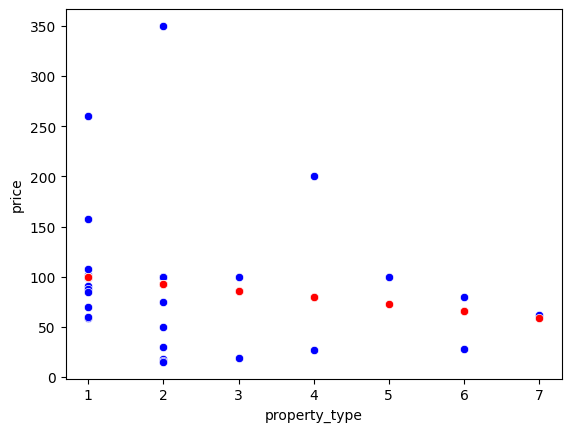

In [52]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color="blue", data=df)
sns.scatterplot(x='property_type', y='Predicciones_property_type', color="red", data=df)

In [53]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model7.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.023879539455691323
Correlación: 0.15453006003911124
